# Основные концепции Machine Learning. Домашняя работа

In [0]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.cluster import KMeans

In [0]:
### Здесь требуется загрузить датасет phones.csv ###

In [2]:
phones = pd.read_csv("1.8_phones.csv")
phones

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
...,...,...,...,...
95,512,iOS,8398,2011
96,64,Android,7197,2016
97,32,Android,5694,2014
98,32,Android,7589,2016


In [0]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

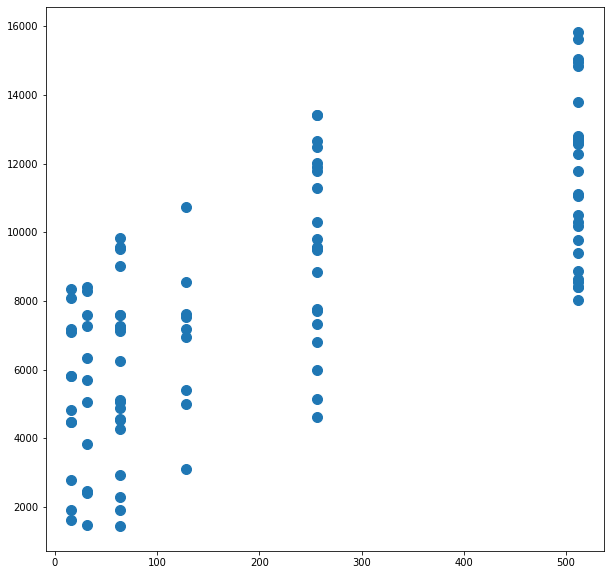

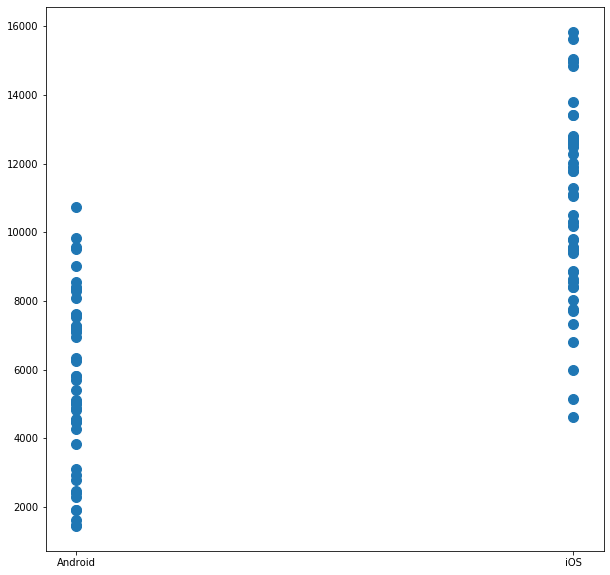

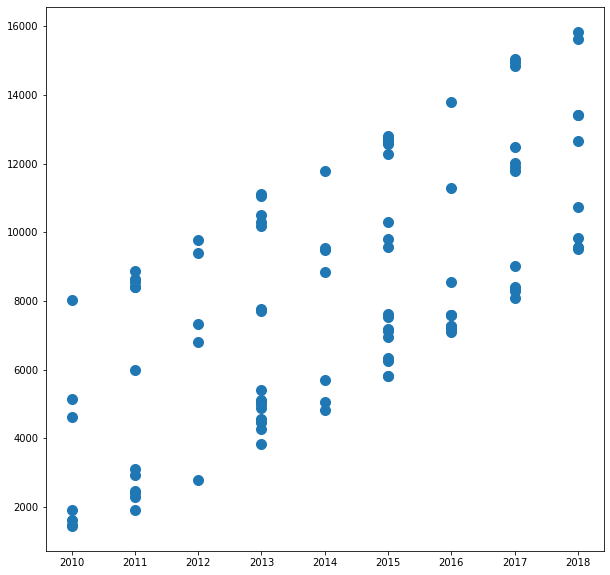

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(phones["disk"], phones["price"], s=100)
plt.show()

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(phones["os"], phones["price"], s=100)
plt.show()

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(phones["year"], phones["price"], s=100)
plt.show()

Задание 1: обучить модель регрессии

In [23]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["year"]]
y = phones["price"]

In [25]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

reg = LinearRegression().fit(X, y)

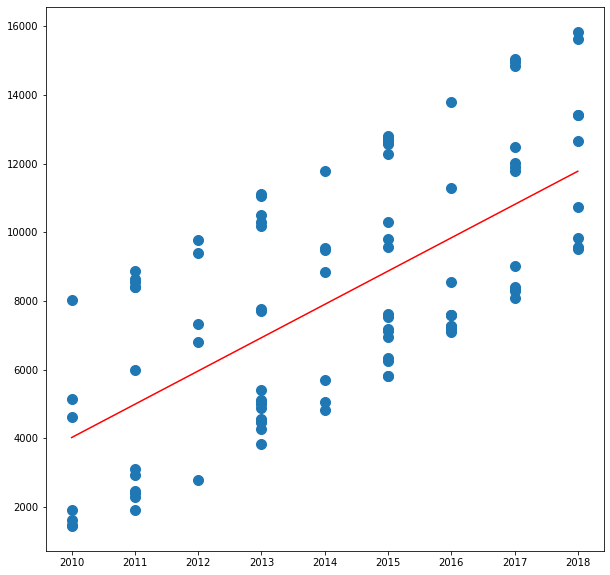

In [31]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

ax.scatter(phones["year"], phones["price"], s=100)
# ax.plot([X.year.min(), X.year.max()], [reg.predict(np.array(X.year.min()).reshape(-1, 1)), 
#                                        reg.predict(np.array(X.year.max()).reshape(-1, 1))], c="red")

ax.plot([X.year.min(), X.year.max()], [reg.predict([[X.year.min()]]), 
                                       reg.predict([[X.year.max()]])], c="red")
plt.show()

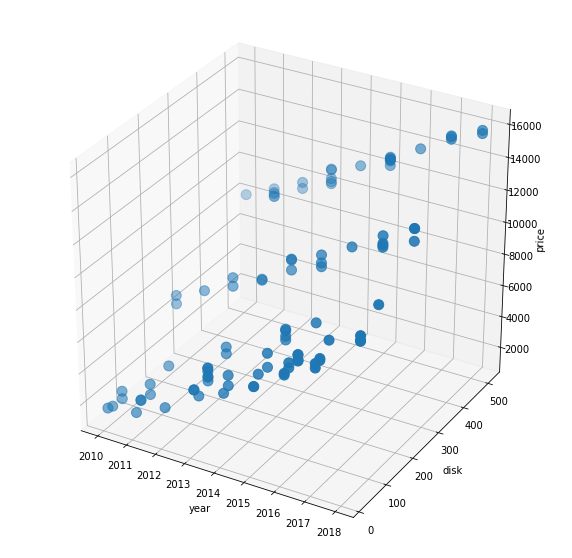

In [32]:
# Второй вариант, год + объем памяти
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

ax.scatter(phones["year"], phones["disk"], phones["price"], s=100)

ax.set_xlabel("year")
ax.set_ylabel("disk")
ax.set_zlabel("price")

plt.show()

In [34]:
X = phones[["year", "disk"]]
y = phones["price"]

reg = LinearRegression().fit(X, y)

In [38]:
phones[0:3]

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010


In [41]:
reg.predict(X[0:3])

array([7848.04669442, 7695.81223259, 1720.38970271])

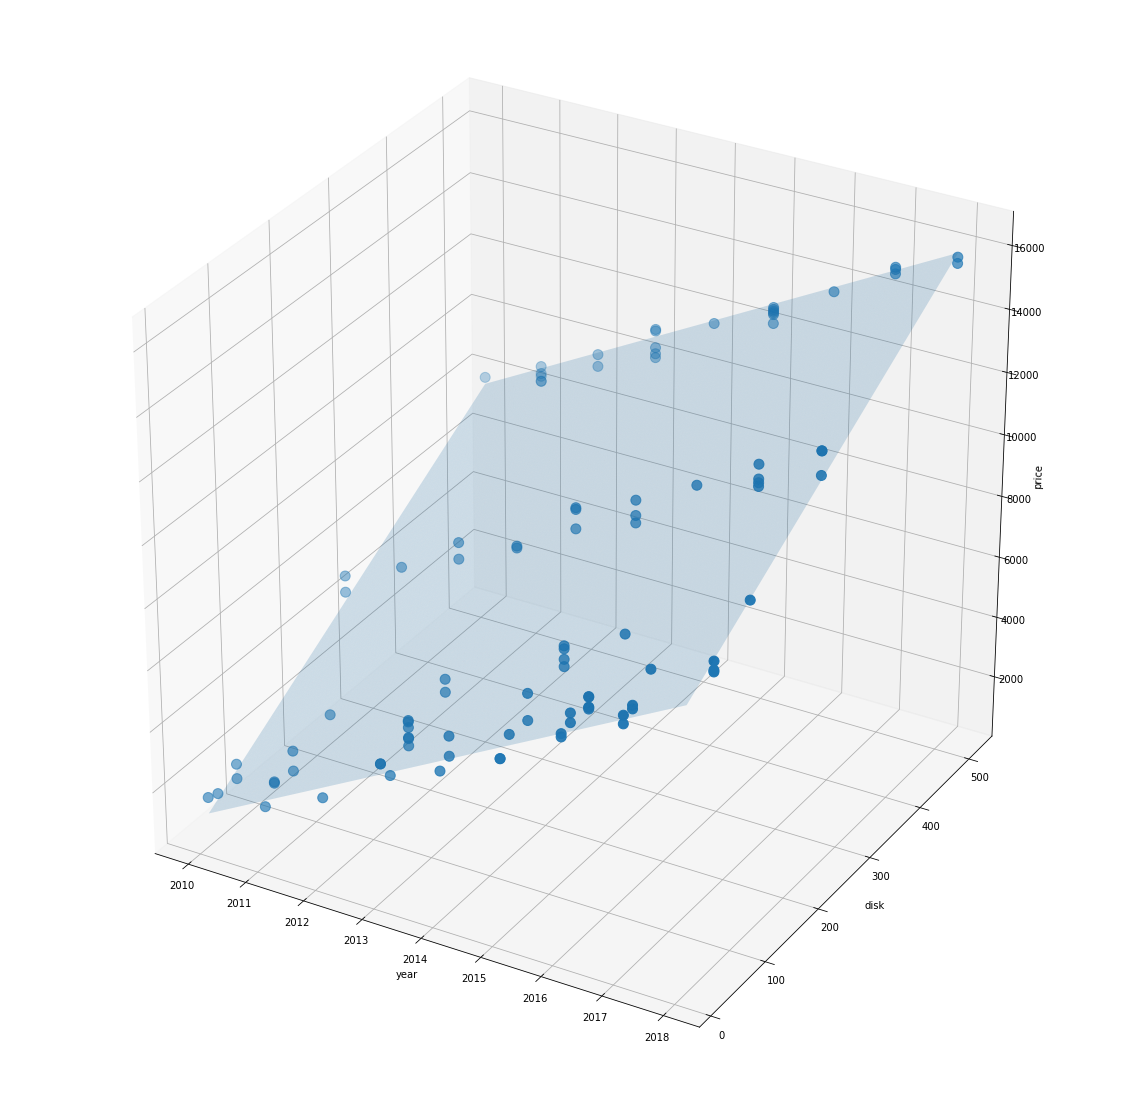

In [43]:
d1, d2 = list(), list()
for x in np.linspace(min(phones["year"]), max(phones["year"]), 100):
    for y in np.linspace(min(phones["disk"]), max(phones["disk"]), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

fig = plt.figure(figsize=(20, 20)) 
ax = plt.axes(projection="3d") 
ax.scatter(phones["year"], phones["disk"], phones["price"], s=100)
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)

ax.set_xlabel("year")
ax.set_ylabel("disk")
ax.set_zlabel("price")

# изменяем позицию камеры и отрисовываем картинку
ax.elev = 27
plt.show()

Задание 2: обучить модель классификации

In [49]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["year", "price"]]
y = phones["os"]

In [50]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
cl = DecisionTreeClassifier().fit(X, y)

In [51]:
print(export_text(cl))

|--- feature_1 <= 7660.50
|   |--- feature_0 <= 2012.50
|   |   |--- feature_1 <= 3855.50
|   |   |   |--- class: Android
|   |   |--- feature_1 >  3855.50
|   |   |   |--- class: iOS
|   |--- feature_0 >  2012.50
|   |   |--- class: Android
|--- feature_1 >  7660.50
|   |--- feature_0 <= 2015.50
|   |   |--- class: iOS
|   |--- feature_0 >  2015.50
|   |   |--- feature_1 <= 11017.00
|   |   |   |--- class: Android
|   |   |--- feature_1 >  11017.00
|   |   |   |--- class: iOS



In [53]:
cl.predict(X[0:8])

array(['Android', 'Android', 'Android', 'iOS', 'Android', 'iOS',
       'Android', 'Android'], dtype=object)

In [84]:
phones.head(20)

,disk,os,price,year,osf
0,64,Android,7256,2016,1
1,128,Android,7623,2015,1
2,64,Android,1916,2010,1
3,512,iOS,15045,2017,0
4,16,Android,4478,2013,1
5,512,iOS,15842,2018,0
6,128,Android,7191,2015,1
7,64,Android,4277,2013,1
8,512,iOS,12797,2015,0
9,64,Android,6256,2015,1


Задание 3: обучить модель кластеризации

In [85]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['year', 'price']]

In [86]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
clust = KMeans(n_clusters=6).fit(X)

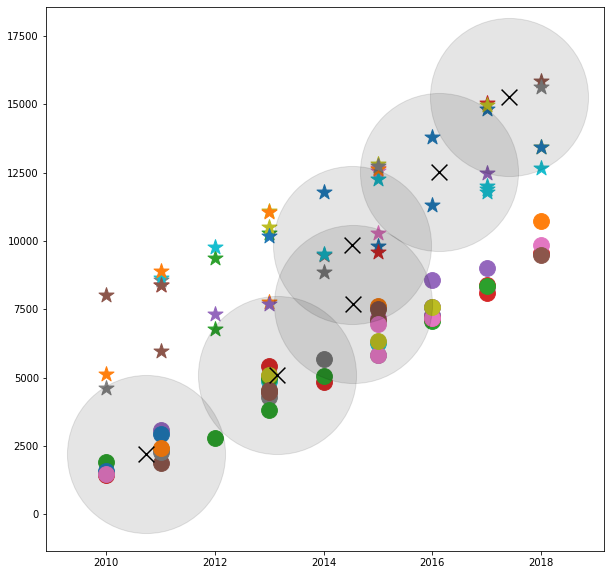

In [89]:
fig = plt.figure(figsize=(10, 10))
# ax = plt.axes(projection="3d")

markers = {1: "o", 0: "*"}
for d1, d2, os in zip(phones.year, phones.price, phones.osf):
    plt.scatter(d1, d2, s=250, marker=markers[os])
    # ax.scatter(d1, d2, os, s=250, marker=markers[os])
    
for c in clust.cluster_centers_:
    plt.scatter(c[0], c[1], s=250, marker="x", c="black")
    plt.scatter(c[0], c[1], s=250 * 1e2, c="black", alpha=0.1)

plt.show()